In [104]:
import jax, jax.numpy as jnp
import flax.linen as nn
import optax
import matplotlib.pyplot as plt

{'params': {'linear': {'kernel': Array([[-0.4583346]], dtype=float32), 'bias': Array([0.], dtype=float32)}}}
{'params': {'linear': {'bias': (1,), 'kernel': (1, 1)}}}
26.030981 [[0.40914968]] [0.47521338]
17.211973 [[1.1141243]] [0.8411348]
11.522523 [[1.6873657]] [1.122292]
7.8445086 [[2.153759]] [1.3378018]
5.4617515 [[2.5334375]] [1.5025486]
3.9147367 [[2.8426993]] [1.6281095]
2.90808 [[3.0947459]] [1.7234782]
2.2515428 [[3.300277]] [1.7956331]
1.8223588 [[3.4679692]] [1.849981]
1.5411404 [[3.6048632]] [1.8907048]
1.356441 [[3.716675]] [1.9210352]
1.2348475 [[3.8080485]] [1.9434628]
1.1546108 [[3.8827584]] [1.9599041]
1.101541 [[3.9438746]] [1.9718299]
1.0663594 [[3.9938958]] [1.9803667]
1.0429837 [[4.0348563]] [1.9863745]
1.0274175 [[4.0684133]] [1.990508]
1.01703 [[4.0959177]] [1.9932635]
1.0100838 [[4.118472]] [1.9950161]
1.0054291 [[4.1369753]] [1.9960477]
1.0023044 [[4.1521616]] [1.996569]
1.0002027 [[4.1646314]] [1.9967366]
0.99878645 [[4.1748743]] [1.996666]
0.9978306 [[4.1832

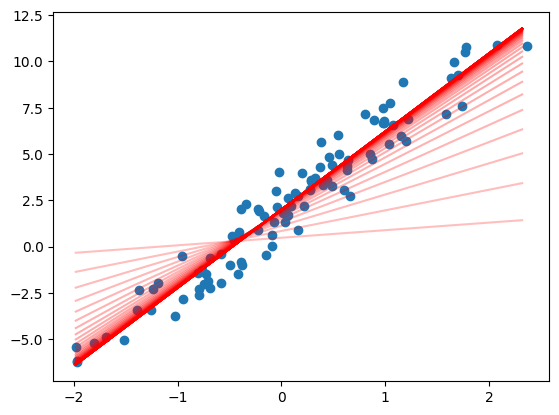

In [103]:
class Linear(nn.Module):
    features: int
    use_bias: bool

    def setup(self):
        self.linear = nn.Dense(features=self.features, use_bias=self.use_bias)

    def __call__(self, x):
        return self.linear(x)
    
model = Linear(features=1, use_bias=True)
params = model.init(key, jnp.ones((1, d)))
print(params)
print(jax.tree_util.tree_map(jnp.shape, params))

n, d = 100, 1
key = jax.random.PRNGKey(0)
x = jax.random.normal(key, (n, d))
y = 4 * x + jax.random.normal(jax.random.PRNGKey(42), (n, d)) + 2

xs = jnp.arange(jnp.min(x), jnp.max(x), 0.1)
ys = xs * params['params']['linear']['kernel'] + params['params']['linear']['bias']
plt.plot(x, y, 'o')

loss_fn = lambda params, x, y: jnp.mean(jnp.square(model.apply(params, x) - y))
grad_fn = jax.value_and_grad(loss_fn)
lr = 1e-1

for idx in range(50):
    loss, gradients = grad_fn(params, x, y)
    params = jax.tree_util.tree_map(lambda p, g: p - lr * g, params, gradients)
    slope, intercept = params['params']['linear']['kernel'], params['params']['linear']['bias']
    print(loss, slope, intercept)
    plt.plot(xs, (slope * xs + intercept).reshape(-1), 'r', alpha=0.25 + idx / 100)